# **Regressão Logística**

Conforme falamos na última aula, a regressão logística é um modelo linear que pode utilizar as características de entrada ($X$) e estimar a *probabilidade* daquele conjunto de características pertecer a cada uma das classes.

Vamos lembrar da equação que define a regressão logística:

$$p(Y=1|X) = \frac{1}{1+e^{-(a_0+\sum_{i=1}^{m}a_ix_i)}}$$

Na equação acima:

- $a_0$ - é conhecido como *intercepto* e representa o valor da probabilidade daquele conjunto de características pertencer à classe 1, quando todos os outros valores $x_i = 0$. Pode ou não ter significado físico.
- $x_i$ são os valores das características que queremos modelar.
- $a_i$ são as *inclinações* ou *coeficientes angulares*. Representam o efeito médio que cada variável $x_i$ tem sobre a probabilidade. Voltaremos a eles posteriormente.

O termo $k = a_0 + \sum_{i=1}^{m} a_i x_i$ determina a reta ou o hiperplano que vai separar as classes.

Nativamente, a regressão logística funciona para classificação de problemas binários (0 / 1). Porém, com algumas modificações (que falaremos lá em redes neurais), ela pode ser adaptada para problemas multi-classes.

Vamos começar a resolver nosso problema de crédito bancário (Fonte: https://www.kaggle.com/datasets/mpwolke/cusersmarildownloadsgermancsv)

In [37]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
# para normalização - MinMaxScaler
# para padronização normal - StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# ignorar warnings (opcional)
warnings.filterwarnings('ignore')

In [2]:
# conectar o colab ao Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# lendo os dados
PATH = '/content/drive/MyDrive/Bootcamp_DataScience/AlgoritmosInteligenciaArtificialClassificacao/datasets/german_credit.csv'
data = pd.read_csv(PATH)
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
# analisar a tipagem dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [5]:
# analisar dados nulos - forma 2
data.isna().sum()

,0
Creditability,0
Account Balance,0
Duration of Credit (month),0
Payment Status of Previous Credit,0
Purpose,0
Credit Amount,0
Value Savings/Stocks,0
Length of current employment,0
Instalment per cent,0
Sex & Marital Status,0


<Axes: >

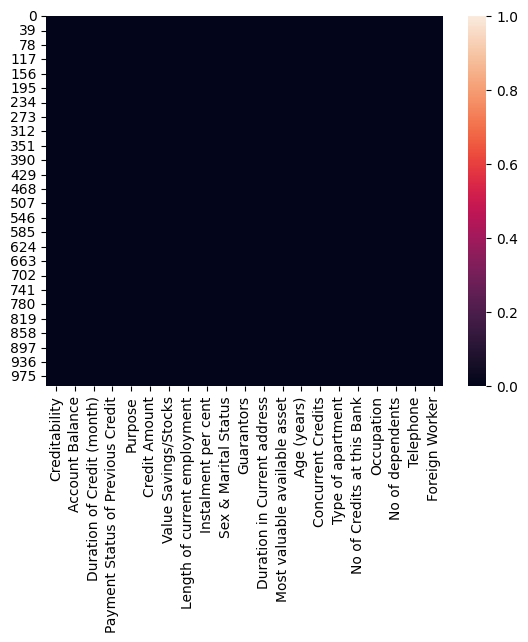

In [6]:
# analise de dados nulos - forma 3
sns.heatmap(data.isna(), vmin=0, vmax=1)

In [7]:
# adicionar uma coluna nula
data['test'] = np.nan

<Axes: >

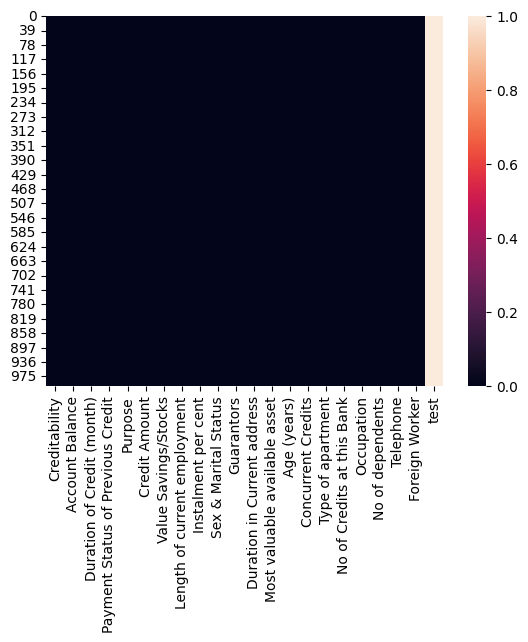

In [8]:
# analise de dados nulos - forma 3
sns.heatmap(data.isna(), vmin=0, vmax=1)

In [9]:
# eliminando a coluna test
data.drop(columns=['test'], inplace=True)
# data = data.drop(columns=['test'])

In [10]:
# (opcional) modificar os nomes das colunas
data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data.head(1)

,creditability,account_balance,duration_of_credit_month,payment_status_of_previous_credit,purpose,credit_amount,value_savings/stocks,length_of_current_employment,instalment_per_cent,sex_&_marital_status,...,duration_in_current_address,most_valuable_available_asset,age_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1


In [11]:
# verificar o balanceamento das classes
data['creditability'].value_counts(normalize=True)

,proportion
creditability,
1,0.7
0,0.3


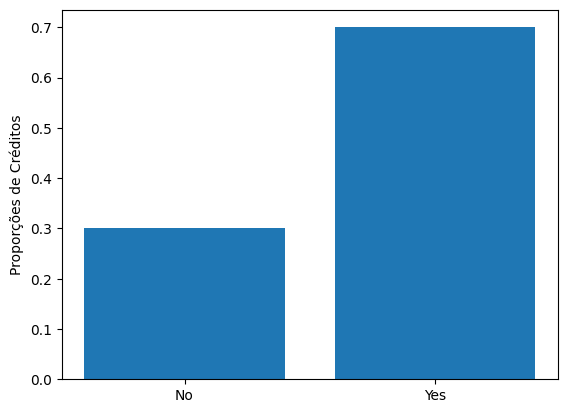

In [12]:
# outra forma de ver o balanceamento de classes
proportions = data['creditability'].value_counts(normalize=True)

plt.bar(x=proportions.index, height=proportions.values)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylabel('Proporções de Créditos')
plt.show()

In [13]:
# para iniciar - apenas variáveis numéricas (reais)
data = data[['creditability', 'credit_amount', 'age_years', 'duration_of_credit_month',
             'concurrent_credits', 'length_of_current_employment', 'no_of_dependents']]
data.head()

,creditability,credit_amount,age_years,duration_of_credit_month,concurrent_credits,length_of_current_employment,no_of_dependents
0,1,1049,21,18,3,2,1
1,1,2799,36,9,3,3,2
2,1,841,23,12,3,4,1
3,1,2122,39,12,3,3,2
4,1,2171,38,12,1,3,1


In [14]:
# verificando infos dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   creditability                 1000 non-null   int64
 1   credit_amount                 1000 non-null   int64
 2   age_years                     1000 non-null   int64
 3   duration_of_credit_month      1000 non-null   int64
 4   concurrent_credits            1000 non-null   int64
 5   length_of_current_employment  1000 non-null   int64
 6   no_of_dependents              1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [15]:
# outra forma de verificar tamanho dos dados
data.shape

(1000, 7)

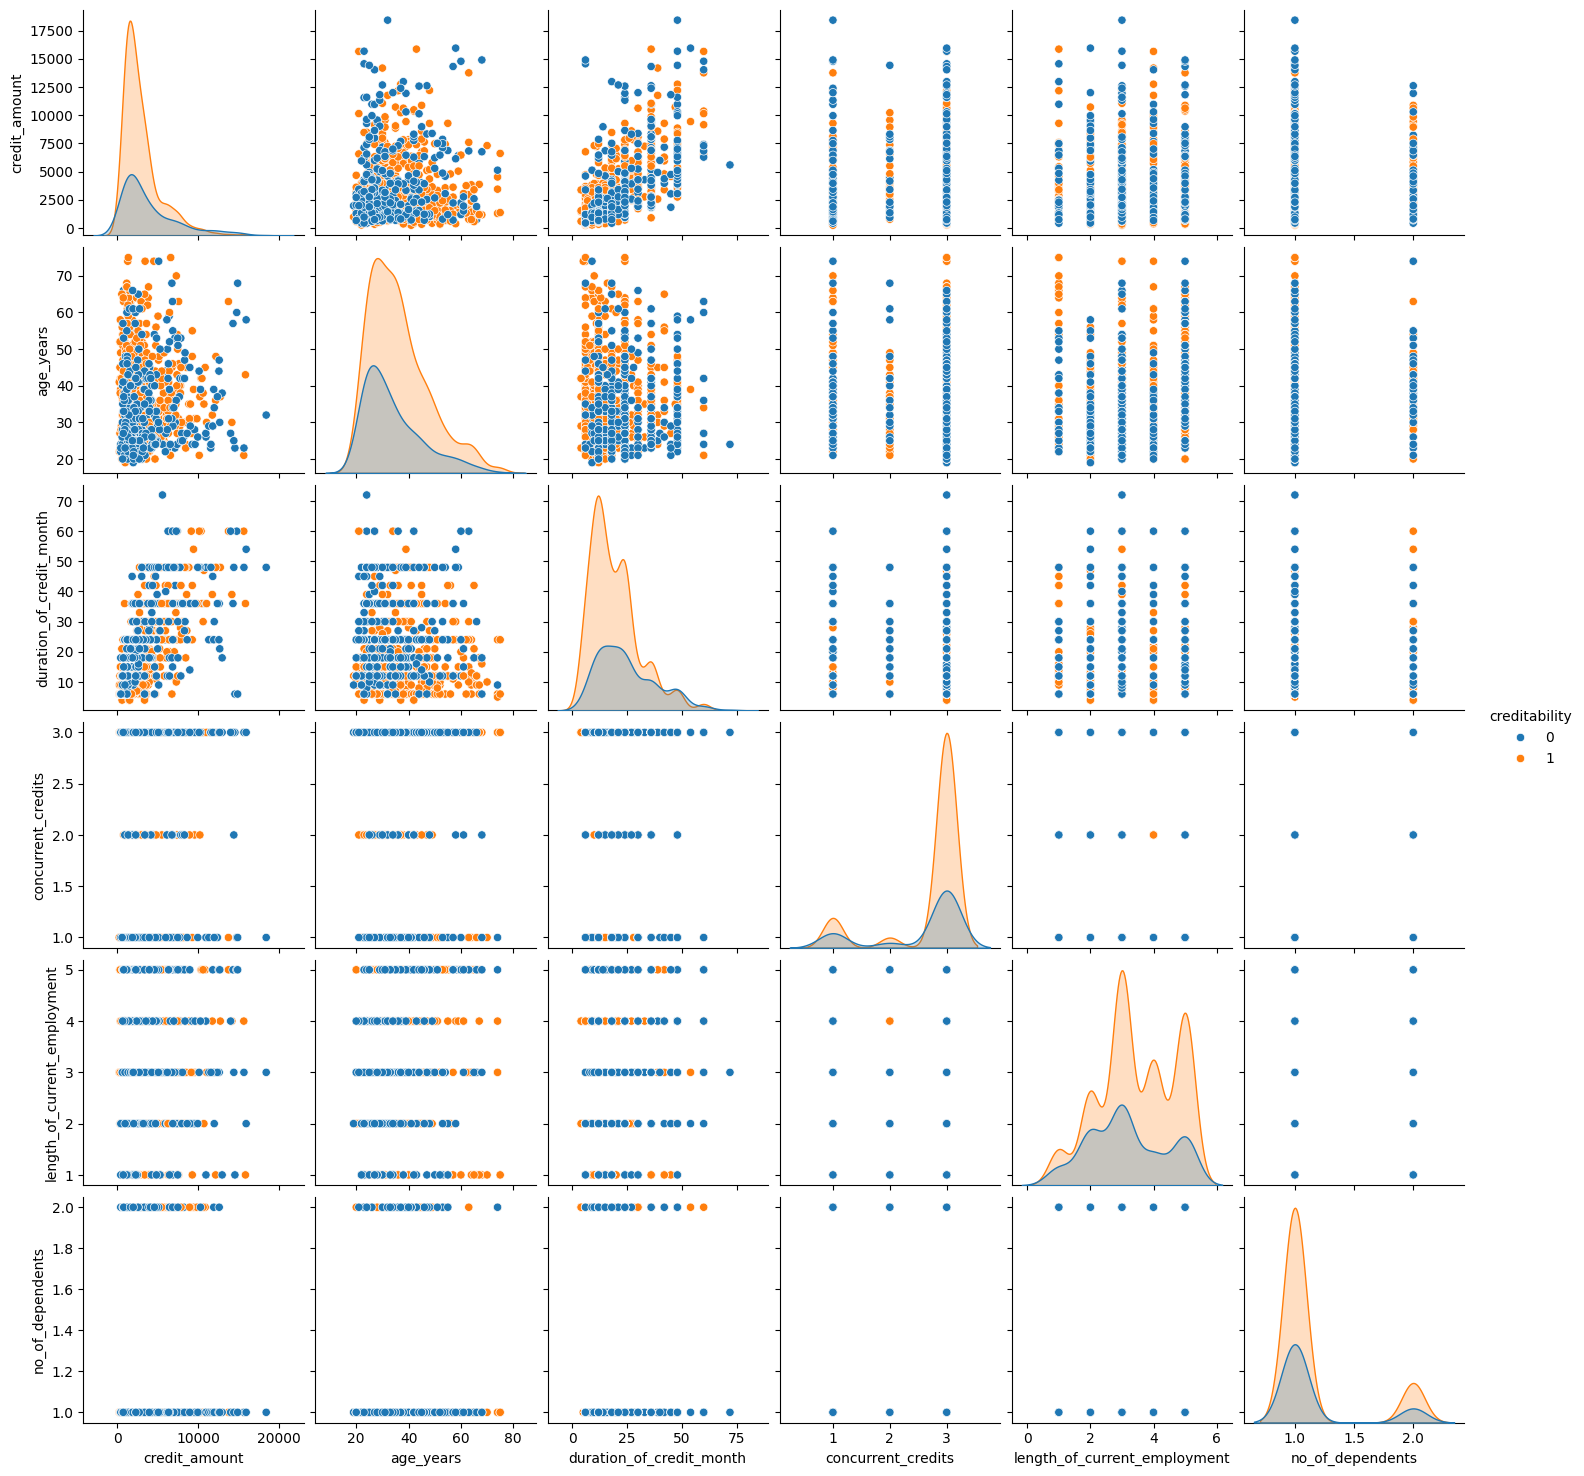

In [16]:
# analise de separabilide linear (visual)
sns.pairplot(data, hue='creditability')

Aparentemente, nenhum das combinações 2 x 2 apresenta separabilidade linear. Mas não percamos as esperanças. Um conjunto de dados pode ser linearmente separável em *dimensões maiores*.

No entanto, nossa cognição é limita a enxergar em 3 dimensões.

Mesmo assim, vamos partir para as etapas de modelagem. Mas primeiro, precisamos separar uma parte da base de dados para ser utilizada como teste. Por quê?

In [17]:
# separando x e y
x = data.drop(columns=['creditability'])
y = data[['creditability']]

In [18]:
# separação treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [19]:
# analise de proporções
props = pd.DataFrame(y.value_counts(normalize=True).values, columns=['original'])
props['train'] = y_train.value_counts(normalize=True).values
props['test'] = y_test.value_counts(normalize=True).values
props

,original,train,test
0,0.7,0.698571,0.703333
1,0.3,0.301429,0.296667


In [20]:
# separação treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

props = pd.DataFrame(y.value_counts(normalize=True).values, columns=['original'])
props['train'] = y_train.value_counts(normalize=True).values
props['test'] = y_test.value_counts(normalize=True).values
props

,original,train,test
0,0.7,0.7,0.7
1,0.3,0.3,0.3


Agora nossas amostras de treinamento e teste são representativas e podemos prosseguir com nossa análise.

Sempre que formos construir um modelos, precisamos estabelecer uma referência, ou seja, precisamos ter uma base para comparação dos desempenhos. Isso é conhecido como comparação *baseline*.

No nosso estudo, nosso baseline será um modelo totalmente enviesado que prevê que todos os clientes, independente de suas características, terão credibilidade.

In [21]:
# criar um modelo baseline - hipótese: todos merecem crédito (todos = 1)
y_base = np.repeat(1, repeats=y_test.shape[0])
y_base

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
# métricas do baseline
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.70      1.00      0.82       210

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300



In [23]:
# criar um primeiro modelo de regressão Logística
rl1 = LogisticRegression(penalty=None).fit(x_train, y_train)

# fazendo a previsão do teste
yhat_rl1 = rl1.predict(x_test)

# analisando métricas
print(classification_report(y_test, yhat_rl1))

              precision    recall  f1-score   support

           0       0.67      0.11      0.19        90
           1       0.72      0.98      0.83       210

    accuracy                           0.72       300
   macro avg       0.69      0.54      0.51       300
weighted avg       0.70      0.72      0.64       300



In [24]:
# prevendo probabilidades
yhat_rl1_prob = rl1.predict_proba(x_test)
yhat_rl1_prob

array([[0.27651996, 0.72348004],
       [0.22714028, 0.77285972],
       [0.31513297, 0.68486703],
       [0.2474231 , 0.7525769 ],
       [0.49211911, 0.50788089],
       [0.39778367, 0.60221633],
       [0.25300044, 0.74699956],
       [0.12687053, 0.87312947],
       [0.52880577, 0.47119423],
       [0.2899596 , 0.7100404 ],
       [0.32809779, 0.67190221],
       [0.27170062, 0.72829938],
       [0.26733181, 0.73266819],
       [0.25158885, 0.74841115],
       [0.25279408, 0.74720592],
       [0.16613958, 0.83386042],
       [0.38075074, 0.61924926],
       [0.2782422 , 0.7217578 ],
       [0.22212926, 0.77787074],
       [0.25113229, 0.74886771],
       [0.16558281, 0.83441719],
       [0.19830704, 0.80169296],
       [0.40085871, 0.59914129],
       [0.34465476, 0.65534524],
       [0.27496685, 0.72503315],
       [0.23381548, 0.76618452],
       [0.31230042, 0.68769958],
       [0.57485113, 0.42514887],
       [0.33851164, 0.66148836],
       [0.27116877, 0.72883123],
       [0.

Por ser um modelo baseado em combinações lineares, o modelo de regressão logística é facilmente *enviesado* pelas amplitudes de variação dos atributos de entrada. Atributos com amplitudes muito diferentes podem enviesar os coeficientes do modelo e torná-lo instável.

Vamos conhecer uma técnica interessante para manter passos de pré-processamento unidos num único objeto.

In [25]:
# analisando as grandezas
x_train.head()

,credit_amount,age_years,duration_of_credit_month,concurrent_credits,length_of_current_employment,no_of_dependents
564,4272,26,30,3,3,1
910,4870,53,24,3,3,2
416,1154,57,11,3,1,1
249,5248,26,21,3,3,1
376,1108,28,12,3,4,1


In [27]:
# ver o que acontece no scaler
RobustScaler().fit_transform(x_train)

array([[ 0.70812365, -0.5       ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.92307692,  1.42857143,  0.5       ,  0.        ,  0.        ,
         1.        ],
       [-0.41265277,  1.71428571, -0.58333333,  0.        , -2.        ,
         0.        ],
       ...,
       [-0.33932423,  0.5       ,  0.5       , -1.        ,  2.        ,
         0.        ],
       [ 0.48670022,  1.14285714,  1.        , -1.        ,  2.        ,
         0.        ],
       [ 0.41121495,  0.64285714,  1.5       ,  0.        ,  2.        ,
         1.        ]])

In [29]:
# criar um pipeline de modelagem
rl2 = Pipeline([
    ('scaler', RobustScaler()),
    ('model', LogisticRegression(penalty=None))
])

# ajustando o pipeline
rl2.fit(x_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('model', LogisticRegression(penalty=None))])

In [33]:
# acessar "coisas" do pipeline
print('Mediana e IQR de cada coluna')
print(rl2['scaler'].center_)
print(rl2['scaler'].scale_)

# acessar os coeficientes do modelo
print()
print('Coeficientes do Modelo')
print('Modelo RL1', rl1.coef_)
print('Modelo RL2', rl2['model'].coef_)

Mediana e IQR de cada coluna
[2.302e+03 3.300e+01 1.800e+01 3.000e+00 3.000e+00 1.000e+00]
[2.782e+03 1.400e+01 1.200e+01 1.000e+00 1.000e+00 1.000e+00]

Coeficientes do Modelo
Modelo RL1 [[-4.39797993e-05  1.04129660e-02 -2.97246659e-02  2.18481632e-01
   1.65729201e-01  1.28821149e-01]]
Modelo RL2 [[-0.11708542  0.14728597 -0.35903238  0.23904041  0.16618534  0.19425842]]


In [35]:
# fazer novas previsões
yhat_rl2 = rl2.predict(x_test)

# analisar as métricas
print(classification_report(y_test, yhat_rl2))

              precision    recall  f1-score   support

           0       0.67      0.11      0.19        90
           1       0.72      0.98      0.83       210

    accuracy                           0.72       300
   macro avg       0.69      0.54      0.51       300
weighted avg       0.70      0.72      0.64       300



Também podemos incorporar conhecimentos específicos do negócio para avaliar nossos modelos. Vamos supor as seguintes situações:

- **Cliente credível previsto como credível (TP)**: + 50.00
- **Cliente credível previsto como não credível (FN)**: -5.00
- **Cliente não credível previsto como não credível (TN)**: - 5.00
- **Cliente não credível previsto como credível (FP)**: - 150.00

In [38]:
def profit(yreal, ypred):
  # calcular a matrix de confusão
  cm = confusion_matrix(yreal, ypred)

  # extrair as pontuações
  tp = cm[1, 1] # verdadeiros positivos
  fp = cm[0, 1] # falsos positivos
  tn = cm[0, 0] # verdadeiros negativos
  fn = cm[1, 0] # falsos negativos

  # lucro total
  lucro = (50 * tp) + (-5 * fn) + (-5 * tn) + (-150 * fp)

  # retornar o lucro médio por cliente
  return lucro / yreal.shape[0]

In [39]:
print(f'Lucro Médio - modelo baseline: ', profit(y_test, y_base))
print(f'Lucro Médio - modelo RL1: ', profit(y_test, yhat_rl1))
print(f'Lucro Médio - modelo RL2: ', profit(y_test, yhat_rl2))

Lucro Médio - modelo baseline:  -10.0
Lucro Médio - modelo RL1:  -6.083333333333333
Lucro Médio - modelo RL2:  -6.083333333333333


- Repetir toda a análise feita para o German Credit, porém para o Drug200 (drugC = 1, o resto = 0)
- Testar as métricas de outras formas de escalonamento
- Para o drug200, adotar as seguintes métricas:
 - TP = 100 (a pessoa acertou o remédio que deve tomar e não usou o plano de saúde)
 - FP = -150 (a pessoa errou o remédio e teve de ir ao PS)
 - TN = 100 (a pessoa acertou que não era para tomar o rmédio C e não usou o plano de saúde)
 - FN = -250 (a pessoa deveria tomar o C, mas não tomou, e por isso teve de usar a UTI)
